In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time


#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models

import numpy as np
import pandas as pd

from IPython.core.display import HTML

from IPython.display import clear_output

%matplotlib inline  

# Get the scaled Training and Validation subsets 

In [20]:
X_train, y_train, X_valid, y_valid = utils.get_train_and_validation_data(
    scaled=True,
    use_diagnosis_delay=False,
)

display(X_train.head())
display(X_valid.head())



,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.50,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.67,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.75,0.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.25,0.0,1.0,0.33,0.5,0.0,0.0,0.5,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.50,0.0,1.0,1.00,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,0.5,0.67,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.75,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,1.00,1.0,1.0,1.0,1.0,0.0


,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.75,1.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.25,0.0,1.0,0.33,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.75,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.25,0.0,1.0,1.00,0.5,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,1.00,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.50,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0


# Train the Models using GridSearch using the inputs and outputs created in the previous step

Fitting 5 folds for each of 1 candidates, totalling 5 fits


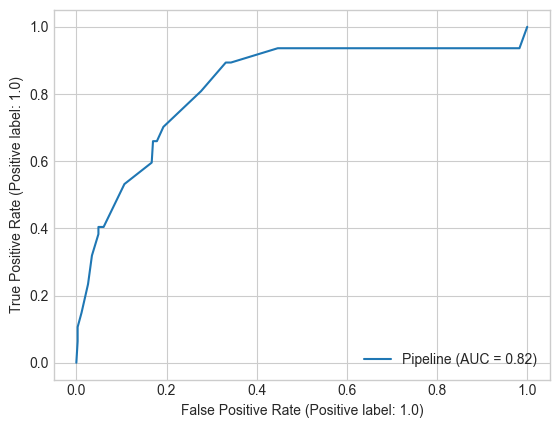


FINISHED !!!


,Dataset,Features,Model,BalAcc,Sens,Spec,f1,AUC,Acc,Prec,Classifier,Hyperparams
0,Single-Model,All Features,Decision Tree,0.73,0.7,0.76,0.42,0.77,0.77,0.77,DecisionTreeClassifier,"{'class_weight': 'balanced', 'criterion': 'gin..."


1 samples were saved
CPU times: user 210 ms, sys: 170 ms, total: 380 ms
Wall time: 2.17 s


In [43]:
%%time

csv_results_saved = os.path.abspath('exec_results/results_Single_Model.csv')


i = 1


# verify if already exists an CSV with the results
overwrite_results_saved_previously = True

if os.path.exists(csv_results_saved) and overwrite_results_saved_previously==False:
    print('Reading results saved previously...')
    df_results = utils.read_csv(csv_file=csv_results_saved)
else:
    df_results = None


kfold = utils_exec_models.get_kfold_splits()


## define the models and hyperparameters for the GridSearch
param_grid = []

TESTING = True
# TESTING = False

# utils_exec_models.create_models_SVM_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NB_grid(param_grid, testing=TESTING)
utils_exec_models.create_models_DT_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_kNN_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_RF_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NN_grid(qty_features=X_train.shape[1],  param_grid=param_grid, testing=TESTING)

#display(param_grid)


if len(param_grid) > 0:

    ## execute GridSearch
    grid, df_results_aux = utils_exec_models.exec_grid_search(
        param_grid=param_grid, 
        X=X_train, 
        y=y_train,
        cv=kfold,
        verbose=1,
        return_train_score=False,
        sort_results=False,
        dataset_info='Single-Model',
        features_info='All Features',
        #
        n_jobs=8, 
        X_valid=X_valid,
        y_valid=y_valid.values.ravel(),
        plot_roc_curve=True,
    )

    
    if df_results is None:
        df_results = df_results_aux
    else:
        df_results = pd.concat([df_results, df_results_aux])

#     clear_output()

    time.sleep(2)

    
print()
print('FINISHED !!!')


# sort performances results and show results
df_results = utils_exec_models.sort_performances_results(df=df_results)       
display(df_results)

# save the results
utils.save_to_csv(df=df_results, csv_file=csv_results_saved)


In [34]:
print(y_valid.ravel() )



AttributeError: 'DataFrame' object has no attribute 'ravel'

Fitting 5 folds for each of 4 candidates, totalling 20 fits

FINISHED !!!


,Dataset,Features,Model,BalAcc,Sens,Spec,f1,AUC,Acc,Prec,Classifier,Hyperparams
3,Single-Model,All Features,SVM,0.83,0.81,0.84,0.57,0.91,0.84,0.44,SVC,"{'C': 0.3, 'class_weight': 'balanced', 'gamma'..."
1,Single-Model,All Features,SVM,0.83,0.80,0.85,0.57,0.91,0.84,0.45,SVC,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'..."
2,Single-Model,All Features,SVM,0.82,0.79,0.85,0.56,0.90,0.84,0.43,SVC,"{'C': 0.3, 'class_weight': 'balanced', 'gamma'..."
0,Single-Model,All Features,SVM,0.81,0.77,0.86,0.57,0.89,0.85,0.45,SVC,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'..."


4 samples were saved
CPU times: user 210 ms, sys: 11.6 ms, total: 221 ms
Wall time: 3.13 s


---
---
---
# OTHERS

## Test create a classifier using the  model + hyperparams from the results

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC


df_results = utils.read_csv(csv_file=csv_results_saved)

dd = list()

for index, row in df_results.iterrows():
    dd.append([row.Classifier, row.Hyperparams])


for m, h in dd:

    model = utils_exec_models.create_model_from_string(
        model=m,
        hyperparams=h,
    )

#     model.fit(
#         X_train, 
#         y_train[utils.CLASS_COLUMN].ravel()
#     )
    
#     y_pred = model.predict(X_valid)
    
    print(model)
#     print(y_pred)
    print()
    

SVC(C=0.5, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.5, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.7, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.7, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.3, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.3, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1500, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1500, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SV

In [ ]:
df_results

### Show other grid properties

In [ ]:
print(f'Best Bal.Acc.: {grid.best_score_:.2f}')
print(f'        Model: {grid.best_params_["classifier"]} ') 
print(f'Performance using the Validation set:  {grid.score(X_valid, y_valid):.2f}')


